<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
<h4>Grupo 2 - Cohorte 1<h4>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.10.0'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [8]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
    dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  

In [9]:
rango= dataset[score_cols].max()-dataset[score_cols].min()
rango

pf_identity_legal          10.00
pf_identity_sex_male       10.00
pf_identity_sex_female     10.00
pf_identity_sex            10.00
pf_identity_divorce        10.00
pf_identity                10.00
pf_score                    7.34
pf_rank                   161.00
ef_score                    6.53
ef_rank                   161.00
hf_score                    5.43
hf_rank                   161.00
dtype: float64

Al ser una muestra grande con valores de puntuación entre 0 y 10 (en el caso de las variables que indican puntajes), la probabilidad de que el estadístico del rango sea el máximo es alta, por tanto es naturalmente esperable que los rangos hayan tomado los máximos valores posibles, en este caso 10. Para las variables pf_score, ef_score y hf_score podemos decir  que no se alcanzan los valores extremos del puntaje.

Además creemos que no es necesario calcular el rango de las variables pf_rank, ef_rank y hf_rank ya que son ordinales, excepto que no sepamos que los países en estudio son 162. 

2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 

A continuación compararemos la media y mediana de las variables hf_score y pf_identity para cada uno de los países en todos los años. 


In [10]:
median = dataset.groupby(['countries'])[['hf_score', 'pf_identity']].median()
mean = dataset.groupby(['countries'])[['hf_score', 'pf_identity']].mean()

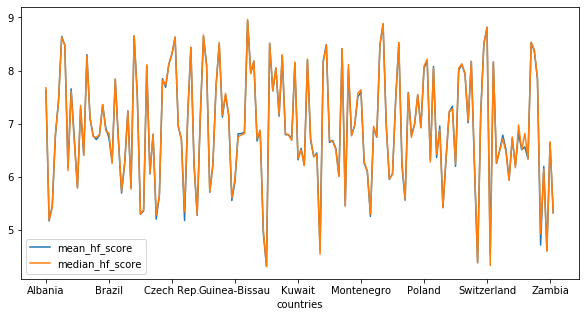

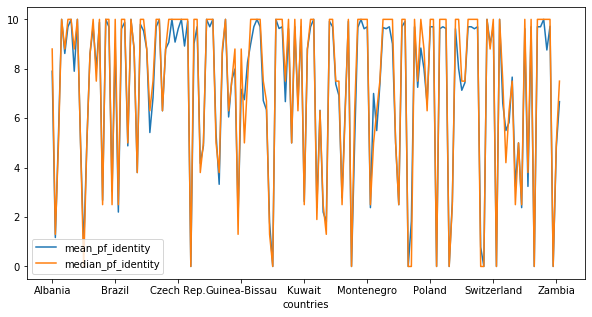

In [11]:
median = median.rename(columns={'hf_score': 'median_hf_score', 'pf_identity': 'median_pf_identity'})
mean = mean.rename(columns={'hf_score': 'mean_hf_score', 'pf_identity': 'mean_pf_identity'})
merged = pandas.merge(mean, median, on='countries')
merged[['mean_hf_score', 'median_hf_score']].plot(figsize=(10,5))
merged[['mean_pf_identity', 'median_pf_identity']].plot(figsize=(10,5))

Viendo los gráficos que comparan la media con la mediana de las variables, tomando la media a lo largo de los años y agrupando por país, podemos apreciar que no hay una gran diferencia en utilizar cualquiera de las medidas de posición. 

3. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

In [12]:
media_mundo = dataset[['pf_identity','hf_score']].mean()
mediana_mundo = dataset[['pf_identity','hf_score']].median()
std_mundo = dataset[['pf_identity','hf_score']].std()

media_latam = dataset[dataset.region == 'Latin America & the Caribbean'][['pf_identity','hf_score']].mean()
mediana_latam = dataset[dataset.region == 'Latin America & the Caribbean'][['pf_identity','hf_score']].median()
std_latam = dataset[dataset.region == 'Latin America & the Caribbean'][['pf_identity','hf_score']].std()

In [13]:
print( 'Para el mundo, las medidas para la variable pf_identity y hf_score son las siguientes.')
print('**pf_identity \nmedia: {} \nmediana: {} \nstd: {}'.format(media_mundo[0],mediana_mundo[0],std_mundo[0]))
print('**hf_score \nmedia: {} \nmediana: {} \nstd: {}'.format(media_mundo[1],mediana_mundo[1],std_mundo[1]))
print()
print( 'Para Latinoamérica y el Caribe, las medidas para la variable pf_identity y hf_score son las siguientes.')
print('**pf_identity \nmedia: {} \nmediana: {} \nstd: {}'.format(media_latam[0],mediana_latam[0],std_latam[0]))
print('**hf_score \nmedia: {} \nmediana: {} \nstd: {}'.format(media_latam[1],mediana_latam[1],std_latam[1]))

Para el mundo, las medidas para la variable pf_identity y hf_score son las siguientes.
**pf_identity 
media: 7.280649350649332 
mediana: 8.8 
std: 3.1815770188081007
**hf_score 
media: 6.978214285714276 
mediana: 6.9 
std: 1.0562392335897266

Para Latinoamérica y el Caribe, las medidas para la variable pf_identity y hf_score son las siguientes.
**pf_identity 
media: 8.582170542635659 
mediana: 10.0 
std: 1.8758323542858797
**hf_score 
media: 7.036976744186047 
mediana: 7.02 
std: 0.6348970989895227


Para la variable hf_score, si bien las medidas de posición son mayores para Latam que para el resto del mundo, podemos decir que tienen cierta similitud. Esto no ocurre para el caso de la variable pf_identity, donde los valores en Latam son considerablemente mayores. Esto se ve reflejado en el gráfico del item anterior para esta variable. 
Es válido comparar los promedios obtenidos de la región de Latam con el promedio del mundo.

4. ¿Tiene sentido calcular la moda?

In [14]:
moda_mundo = dataset[['pf_identity','hf_score']].mode()
moda_latam = dataset[dataset.region == 'Latin America & the Caribbean'][['pf_identity','hf_score']].mode()

In [15]:
print( 'Para el mundo, el valor de la moda es la siguiente:')
print('**pf_identity \nmoda: {}'.format(moda_mundo.iloc[0][0]))
print('**hf_score \nmoda: {}'.format(moda_mundo.iloc[0][1]))
print()
print( 'Para Latinoamérica y el Caribe, el valor de la moda es la siguiente:')
print('**pf_identity \nmoda: {}'.format(moda_latam.iloc[0][0]))
print('**hf_score \nmoda: {}'.format(moda_latam.iloc[0][1]))

Para el mundo, el valor de la moda es la siguiente:
**pf_identity 
moda: 10.0
**hf_score 
moda: 6.75

Para Latinoamérica y el Caribe, el valor de la moda es la siguiente:
**pf_identity 
moda: 10.0
**hf_score 
moda: 6.72


Si bien los valores de la moda para cada una de las variables, en ambas regiones, es similar, esta medida no permite comparar las variables en estudio en las diferentes regiones. La moda nos indica el valor de la variable que más se repite, pero que se repitan en los dos casos el valor 10 para la variable pf_indentity, por ejemplo, no dice mucho respecto a cómo se posiciona América Latina y el Caribe respecto al mundo. Además, dado que algunas de las variables en cuestión son estrictamente continuas, la moda no seria una medida correcta. 

5. ¿Cómo pueden sanearse los valores faltantes?

Algunas de las posibilidades pueden ser:

A) Si faltan datos de una variable en un país para un año en particular, se podría calcular el promedio de la variable entre el año anterior y posterior al faltante. Sin embargo, explorando un poco el dataset se puede observar que para muchos países faltan datos de determinada variable en reiterados años, por lo que esta posibilidad no funcionaría para todos los países.

B) Otra posibilidad, un poco más general, sería reemplazar los datos faltantes para un país de una región en determinado año por la media de los valores de la región en ese año (esto para cada una de las variables). Veamos esta posiblidad para los países de América Latina en un año en particular, aunque se puede generalizar por año y por región.

In [16]:
dataset_ee=dataset[dataset.region=="Latin America & the Caribbean"]
dataset_ee_2016=dataset_ee[dataset_ee.year==2016]
dataset_ee_2016.head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
165,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.10,45.0,5.40,151.0,6.75,85.0
170,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.87,52.0,7.33,48.0,7.60,50.0
173,2016,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,8.00,49.0,6.43,111.0,7.21,61.0
176,2016,BLZ,Belize,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.43,63.0,6.84,83.0,7.14,64.0
179,2016,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,7.14,76.0,6.17,125.0,6.65,94.0


In [17]:
dataset_ee_2016.select_dtypes(include='float').fillna(dataset_ee_2016.select_dtypes(include='float').mean()).head()

,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
165,10.00,10.0,10.0,10.0,10.0,10.0,8.10,45.0,5.40,151.0,6.75,85.0
170,3.85,10.0,10.0,10.0,10.0,10.0,7.87,52.0,7.33,48.0,7.60,50.0
173,3.85,0.0,0.0,0.0,10.0,5.0,8.00,49.0,6.43,111.0,7.21,61.0
176,3.85,10.0,10.0,10.0,10.0,10.0,7.43,63.0,6.84,83.0,7.14,64.0
179,10.00,10.0,10.0,10.0,10.0,10.0,7.14,76.0,6.17,125.0,6.65,94.0


C) Utilizando otras herramientas de estimación que toman la media y varianza de nuestros datos para generar faltantes, como regresión lineal, aunque estos datos serán generados según la tendencia del conjunto.

D) Otra opción es no tener en cuenta los valores faltantes, esto lo hace pandas por defecto (tal como se observa a continuación). Esta es la opción que finalmente utilizamos en el resto del trabajo, debido a que los valores faltantes no representan una proporción significativa del total de datos. 

In [18]:
dataset.select_dtypes(include='float').mean()

pf_identity_legal          6.379870
pf_identity_sex_male       6.701366
pf_identity_sex_female     7.922078
pf_identity_sex            7.314935
pf_identity_divorce        7.485188
pf_identity                7.280649
pf_score                   7.163409
pf_rank                   77.671429
ef_score                   6.792981
ef_rank                   77.420779
hf_score                   6.978214
hf_rank                   77.465584
dtype: float64

6. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Una opción para detectar outliers es ver si existen valores de la variable que se encuentren más allá de 2.5 desviaciones estándar de la media del conjunto. En otros casos se puede utilizar el rango intercuartílico en lugar de la desviación.

Como mostramos a continuación, la variable hf_score presenta outliers tanto globales como por región y año.

En cuanto a las regiones que presentan outliers tenemos a: Eastern Europe, Sub-Saharan Africa, Latin America & the Caribbean, Western Europe y South Asia. 

En cuanto a la agrupación por años, los outliers para esta variable se dan en 2017, 2016, 2015, 2014 y 2013 (en los países Siria, siempre con un puntaje de cero y Venezuela solo en 2015 y 2017). De estos resultados podemos decir que a lo largo del tiempo, estos países no han crecido y/o se han mantenido en cuanto a libertad humana.

In [19]:
#Outlier globales
hf_score_outlier = (numpy.abs(dataset.hf_score - dataset.hf_score.mean()) >= (2.5 * dataset.hf_score.std()))
dataset[hf_score_outlier].head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
137,2017,SDN,Sudan,Sub-Saharan Africa,NaN,0.0,0.0,0.0,0.0,0.0,3.97,158.0,4.67,160.0,4.32,159.0
141,2017,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,2.53,162.0,5.05,155.0,3.79,162.0
157,2017,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,2.5,4.2,5.03,149.0,2.58,162.0,3.80,161.0
159,2017,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,2.75,161.0,5.84,140.0,4.30,160.0
232,2016,IRQ,Iraq,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,3.21,160.0,5.34,154.0,4.28,159.0


In [20]:
#Outliers por regiones
for region in dataset.region.unique():
    hf_score_outlier = (numpy.abs(dataset[dataset.region == region ].hf_score - dataset[dataset.region == region].hf_score.mean()) >= (2.5 * dataset[dataset.region == region ].hf_score.std()))
    if dataset[dataset.region == region ][hf_score_outlier].empty:
        print('\nNo hay outliers en {} para la variable hf_score.\n'.format(region))
    else:
        print('\nOutliers en {} para la variable hf_score.\n'.format(region))
        display(dataset[dataset.region == region ][hf_score_outlier].head())


Outliers en Eastern Europe para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
174,2016,BLR,Belarus,Eastern Europe,7.0,10.0,10.0,10.0,7.5,8.2,6.24,112.0,6.08,129.0,6.16,122.0
286,2016,RUS,Russia,Eastern Europe,7.0,10.0,10.0,10.0,10.0,9.0,5.77,128.0,6.71,90.0,6.24,119.0
314,2016,UKR,Ukraine,Eastern Europe,7.0,10.0,10.0,10.0,10.0,9.0,6.40,104.0,5.92,138.0,6.16,122.0
448,2015,RUS,Russia,Eastern Europe,7.0,10.0,10.0,10.0,10.0,9.0,5.66,128.0,6.52,105.0,6.09,123.0
476,2015,UKR,Ukraine,Eastern Europe,7.0,10.0,10.0,10.0,10.0,9.0,6.35,107.0,5.40,148.0,5.88,135.0



No hay outliers en Middle East & North Africa para la variable hf_score.


Outliers en Sub-Saharan Africa para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
137,2017,SDN,Sudan,Sub-Saharan Africa,NaN,0.0,0.0,0.0,0.0,0.0,3.97,158.0,4.67,160.0,4.32,159.0
299,2016,SDN,Sudan,Sub-Saharan Africa,NaN,0.0,0.0,0.0,0.0,0.0,3.82,158.0,5.06,156.0,4.44,158.0
744,2013,MUS,Mauritius,Sub-Saharan Africa,NaN,0.0,10.0,5.0,7.5,6.3,8.23,41.0,8.04,7.0,8.13,27.0
906,2012,MUS,Mauritius,Sub-Saharan Africa,NaN,0.0,10.0,5.0,7.5,6.3,8.46,38.0,8.11,5.0,8.29,20.0
1068,2011,MUS,Mauritius,Sub-Saharan Africa,NaN,0.0,10.0,5.0,7.5,6.3,8.47,40.0,8.02,6.0,8.25,21.0



Outliers en Latin America & the Caribbean para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
157,2017,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,2.5,4.2,5.03,149.0,2.58,162.0,3.80,161.0
319,2016,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,6.7,5.60,134.0,2.65,162.0,4.13,161.0
481,2015,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,6.7,5.44,138.0,2.71,159.0,4.08,158.0
643,2014,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.03,121.0,2.96,159.0,4.50,158.0
805,2013,VEN,Venezuela,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.67,96.0,3.01,157.0,4.84,154.0



No hay outliers en Caucasus & Central Asia para la variable hf_score.


No hay outliers en Oceania para la variable hf_score.


Outliers en Western Europe para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
1200,2010,ISL,Iceland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.2,10.0,6.56,97.0,7.88,39.0



Outliers en South Asia para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
1479,2008,MMR,Myanmar,South Asia,NaN,0.0,10.0,5.0,7.5,6.3,5.96,121.0,3.66,141.0,4.81,141.0



No hay outliers en North America para la variable hf_score.


No hay outliers en East Asia para la variable hf_score.



Estos outliers se pueden visualizar en el siguiente boxplot:

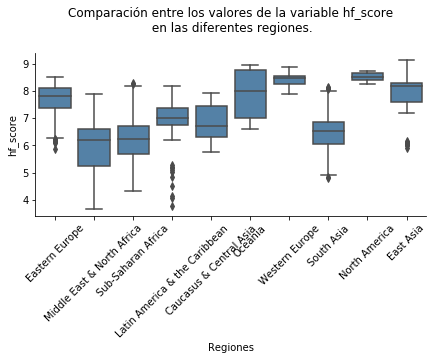

In [21]:
plt.figure(figsize=(7,3))
seaborn.boxplot(data = dataset,
                x='region', y='hf_score',
                color= 'steelblue')
plt.ylabel('hf_score')
plt.xlabel('Regiones')
plt.title('Comparación entre los valores de la variable hf_score\n en las diferentes regiones.\n')
plt.xticks(rotation=45)
seaborn.despine()

In [22]:
#Outliers por años
for year in dataset.year.unique():
    hf_score_outlier = (numpy.abs(dataset[dataset.year == year ].hf_score - dataset[dataset.year == year].hf_score.mean()) >= (2.5 * dataset[dataset.year == year ].hf_score.std()))
    if dataset[dataset.year == year ][hf_score_outlier].empty:
        print('\nNo hay outliers en {} para la variable hf_score.\n'.format(year))

    else:
        print('\nOutliers en {} para la variable hf_score.\n'.format(year))
        display(dataset[dataset.year == year ][hf_score_outlier])


Outliers en 2017 para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
141,2017,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,2.53,162.0,5.05,155.0,3.79,162.0
157,2017,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,2.5,4.2,5.03,149.0,2.58,162.0,3.80,161.0



Outliers en 2016 para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
303,2016,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,2.45,161.0,4.93,159.0,3.69,162.0



Outliers en 2015 para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
465,2015,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,2.79,158.0,4.87,155.0,3.83,159.0
481,2015,VEN,Venezuela,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,6.7,5.44,138.0,2.71,159.0,4.08,158.0



Outliers en 2014 para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
627,2014,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,3.0,158.0,4.88,155.0,3.94,159.0



Outliers en 2013 para la variable hf_score.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
789,2013,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,3.79,156.0,3.97,156.0,3.88,157.0



No hay outliers en 2012 para la variable hf_score.


No hay outliers en 2011 para la variable hf_score.


No hay outliers en 2010 para la variable hf_score.


No hay outliers en 2009 para la variable hf_score.


No hay outliers en 2008 para la variable hf_score.



Lo vemos en el boxplot:

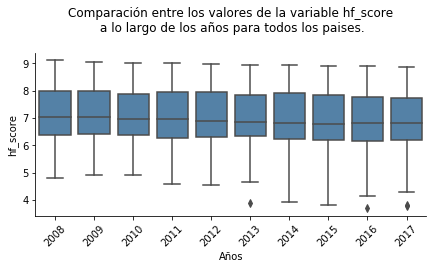

In [23]:
plt.figure(figsize=(7,3))
seaborn.boxplot(data = dataset,
                x='year', y='hf_score',
                color= 'steelblue')
plt.ylabel('hf_score')
plt.xlabel('Años')
plt.title('Comparación entre los valores de la variable hf_score\n a lo largo de los años para todos los paises.\n')
plt.xticks(rotation=45)
seaborn.despine()

Como mostramos a continuación, la variable pf_identity no presenta outliers globales pero si por región y año.

En cuanto a las regiones que presentan outliers tenemos a: Eastern Europe, Caucasus & Central Asia, Oceania, Western Europe y East Asia.

En los años, los outliers para esta variable se dan en 2009 y 2008.

In [24]:
#Outliers globales
pf_identity_outlier= (numpy.abs(dataset.pf_identity - dataset.pf_identity.mean()) >= (2.5 * dataset.pf_identity.std()))
dataset[pf_identity_outlier]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank


In [25]:
#Outliers por regiones
for region in dataset.region.unique():
    pf_identity_outlier = (numpy.abs(dataset[dataset.region == region ].pf_identity - dataset[dataset.region == region].pf_identity.mean()) >= (2.5 * dataset[dataset.region == region ].pf_identity.std()))
    if dataset[dataset.region == region ][pf_identity_outlier].empty:
        print('\nNo hay outliers en {} para la variable pf_identity.\n'.format(region))
    else:
        print('\nOutliers en {} para la variable pf_identity\n'.format(region))
        display(dataset[dataset.region == region ][pf_identity_outlier].head())


Outliers en Eastern Europe para la variable pf_identity



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
162,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,7.70,55.0,7.64,32.0,7.67,45.0
219,2016,GRC,Greece,Eastern Europe,7.0,10.0,10.0,10.0,5.0,7.3,7.94,50.0,6.57,101.0,7.25,60.0
324,2015,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,7.53,62.0,7.64,32.0,7.58,51.0
381,2015,GRC,Greece,Eastern Europe,7.0,10.0,10.0,10.0,5.0,7.3,8.06,43.0,6.58,102.0,7.32,59.0



No hay outliers en Middle East & North Africa para la variable pf_identity.


No hay outliers en Sub-Saharan Africa para la variable pf_identity.


No hay outliers en Latin America & the Caribbean para la variable pf_identity.


Outliers en Caucasus & Central Asia para la variable pf_identity



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
791,2013,TJK,Tajikistan,Caucasus & Central Asia,NaN,0.0,0.0,0.0,7.5,3.8,6.48,105.0,6.12,124.0,6.30,123.0
953,2012,TJK,Tajikistan,Caucasus & Central Asia,NaN,0.0,0.0,0.0,7.5,3.8,6.74,90.0,6.58,99.0,6.66,98.0
1115,2011,TJK,Tajikistan,Caucasus & Central Asia,NaN,0.0,0.0,0.0,7.5,3.8,6.61,97.0,6.28,113.0,6.44,107.0



Outliers en Oceania para la variable pf_identity



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
116,2017,PNG,Pap. New Guinea,Oceania,NaN,0.0,10.0,5.0,5.0,5.0,6.84,85.0,6.36,115.0,6.6,99.0



Outliers en Western Europe para la variable pf_identity



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
106,2017,NLD,Netherlands,Western Europe,7.0,10.0,10.0,10.0,7.5,8.2,9.28,2.0,7.72,25.0,8.5,11.0



No hay outliers en South Asia para la variable pf_identity.


No hay outliers en North America para la variable pf_identity.


Outliers en East Asia para la variable pf_identity



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
75,2017,JPN,Japan,East Asia,7.0,10.0,10.0,10.0,7.5,8.2,8.70,28.0,7.86,17.0,8.28,25.0
99,2017,MNG,Mongolia,East Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.79,49.0,7.43,45.0,7.61,46.0


Vemos plasmado el análisis anterior en el siguiente boxplot:

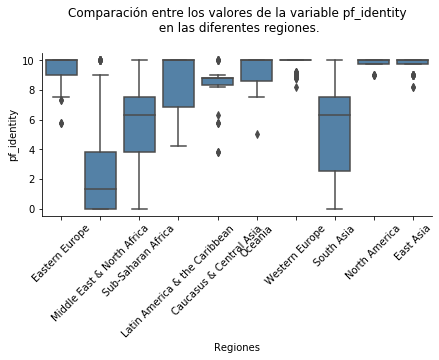

In [26]:
plt.figure(figsize=(7,3))
seaborn.boxplot(data = dataset,
                x='region', y='pf_identity',
                color= 'steelblue')
plt.ylabel('pf_identity')
plt.xlabel('Regiones')
plt.title('Comparación entre los valores de la variable pf_identity\n en las diferentes regiones.\n')
plt.xticks(rotation=45)
seaborn.despine()

In [27]:
#Outliers por años
for year in dataset.year.unique():
    pf_identity_outlier = (numpy.abs(dataset[dataset.year == year ].pf_identity - dataset[dataset.year == year].pf_identity.mean()) >= (2.5 * dataset[dataset.year == year ].pf_identity.std()))
    if dataset[dataset.year == year ][pf_identity_outlier].empty:
        print('\nNo hay outliers en {} para la variable pf_identity.\n'.format(year))
    else:    
        print('\nOutliers en {} para la variable pf_identity\n'.format(year))
        display(dataset[dataset.year == year ][pf_identity_outlier].head())


No hay outliers en 2017 para la variable pf_identity.


No hay outliers en 2016 para la variable pf_identity.


No hay outliers en 2015 para la variable pf_identity.


No hay outliers en 2014 para la variable pf_identity.


No hay outliers en 2013 para la variable pf_identity.


No hay outliers en 2012 para la variable pf_identity.


No hay outliers en 2011 para la variable pf_identity.


No hay outliers en 2010 para la variable pf_identity.


Outliers en 2009 para la variable pf_identity



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
1306,2009,BGD,Bangladesh,South Asia,NaN,0.0,0.0,0.0,0.0,0.0,5.60,127.0,6.22,105.0,5.91,122.0
1340,2009,EGY,Egypt,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.25,138.0,6.17,108.0,5.71,126.0
1391,2009,MRT,Mauritania,Sub-Saharan Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.22,139.0,6.05,114.0,5.64,129.0
1409,2009,OMN,Oman,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.60,126.0,6.98,62.0,6.29,109.0
1410,2009,PAK,Pakistan,South Asia,NaN,0.0,0.0,0.0,0.0,0.0,5.25,137.0,6.06,113.0,5.65,128.0



Outliers en 2008 para la variable pf_identity



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
1488,2008,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.05,139.0,5.63,125.0,5.34,132.0
1489,2008,PAK,Pakistan,South Asia,NaN,0.0,0.0,0.0,0.0,0.0,5.02,140.0,5.85,121.0,5.44,131.0
1490,2008,MRT,Mauritania,Sub-Saharan Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.05,138.0,5.98,113.0,5.52,130.0
1494,2008,LKA,Sri Lanka,South Asia,NaN,0.0,0.0,0.0,0.0,0.0,5.24,137.0,6.15,106.0,5.69,126.0
1498,2008,BGD,Bangladesh,South Asia,NaN,0.0,0.0,0.0,0.0,0.0,5.60,126.0,6.01,111.0,5.80,122.0


Lo vemos en el boxplot:

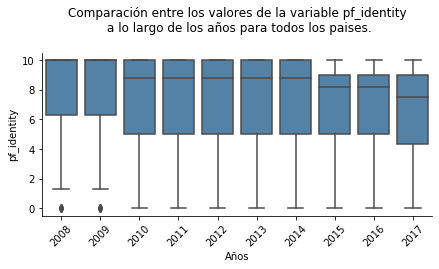

In [28]:
plt.figure(figsize=(7,3))
seaborn.boxplot(data = dataset,
                x='year', y='pf_identity',
                color= 'steelblue')
plt.ylabel('pf_identity')
plt.xlabel('Años')
plt.title('Comparación entre los valores de la variable pf_identity\n a lo largo de los años para todos los paises.\n')
plt.xticks(rotation=45)
seaborn.despine()

Vemos que para hf_score si existen outliers, se trata de outliers globales y por grupo, dado que están concentrados en años y regiones, mientras que para pf_identity solo existen outliers por grupo. A priori no los eliminaríamos del conjunto de datos ya que eso sesgaría los datos en estudio, entendemos que mejor es trabajar con medidas más robustas. Además, pareciera tratarse de datos representativos de la realidad más que de errores de medición. Si bien para un análisis más exahustivo deberíamos estudiar país por país, en función de los requerimientos del trabajo la consideración tomada va en línea con seguir explorando el dataset.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.


Text(0.5, 0, 'Años')

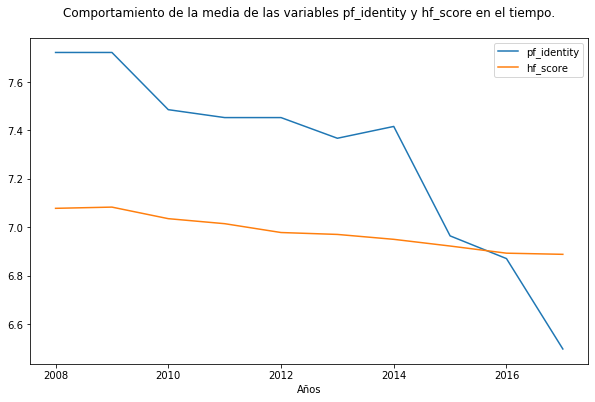

In [29]:
dataset.groupby(["year"]).mean()[['pf_identity', 'hf_score']].plot(figsize=(10,6))
plt.title("Comportamiento de la media de las variables pf_identity y hf_score en el tiempo.\n")
plt.xlabel('Años')

2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?



Eastern Europe


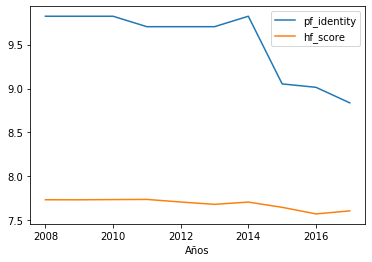

Middle East & North Africa


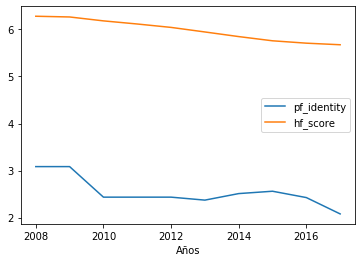

Sub-Saharan Africa


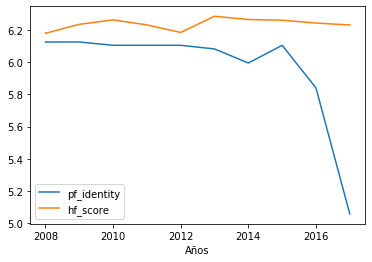

Latin America & the Caribbean


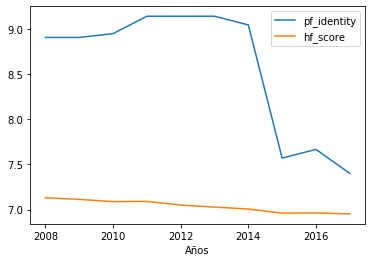

Caucasus & Central Asia


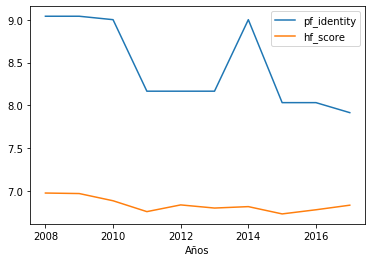

Oceania


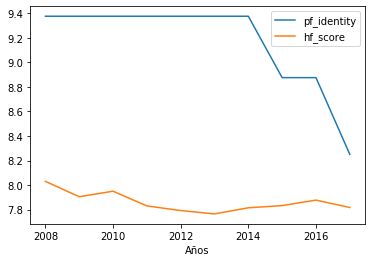

Western Europe


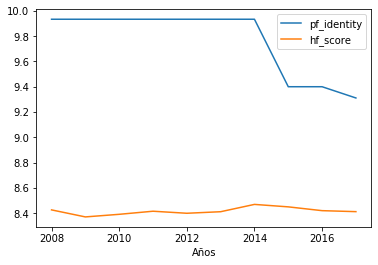

South Asia


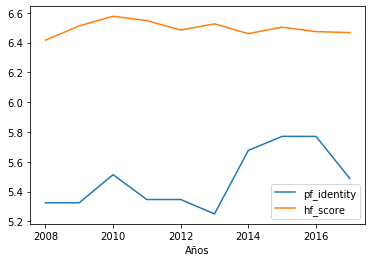

North America


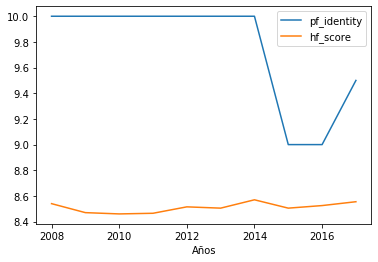

East Asia


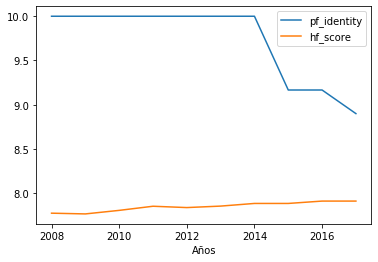

In [30]:
for region in dataset.region.unique():
    print(region)
    df = dataset[dataset.region == region]
    df.groupby(["year"]).mean()[['pf_identity', 'hf_score']].plot()
    plt.xlabel('Años')
    plt.show()

La tendencia observada para la variable hf_score es similar a la del gráfico general para todas las regiones (salvo algunas excepciones como East Asia, por mencionar una región), aunque no hay una pendiente decreciente tan marcada. Se observa que la tendencia de esta variable no presenta cambios tan abruptos como en el caso de pf_identity. 

La tendencia observada para pf_identity es bastante similar a la del gráfico general; se observa como,  para la mayoría de las regiones, el valor de la variable sufre una importante caída en el 2014, y en general, esta tendencia bajista continúa. Más aún a partir de los gráficos se puede ver que el promedio de pf_identity en las regiones de North America, East Asia, Europe(Western y Eastern) para los años 2008 -2014 se mantuvo estable.

3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.


Para graficar vamos a seleccionar algunos países de la región sin tener en cuenta los outliers dado que presentan una tendencia diferente. La totalidad de los países son los siguientes:

In [31]:
data=dataset[dataset.region=="Latin America & the Caribbean"]
data.countries.unique()

array(['Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brazil',
       'Chile', 'Colombia', 'Costa Rica', 'Dominican Rep.', 'Ecuador',
       'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'],
      dtype=object)

A continuación calculamos los outliers para luego excluirlos del análisis:

In [32]:
#Outliers por países de Latam
data=dataset[dataset.region=="Latin America & the Caribbean"]

for countries in data.countries.unique():
    pf_identity_outlier = (numpy.abs(data[data.countries == countries ].pf_identity - data[data.countries == countries].pf_identity.mean()) >= (2.5 * data[data.countries == countries ].pf_identity.std()))    
    if dataset[dataset.countries == countries ][pf_identity_outlier].empty:
        print('\nNo hay outliers en {} para la variable pf_identity.\n'.format(countries))
    else:
        print('\nOutliers en {} para la variable pf_identity.\n'.format(countries))
        display(data[data.countries == countries ][pf_identity_outlier].head())


Outliers en Argentina para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
165,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.10,45.0,5.40,151.0,6.75,85.0
327,2015,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.03,46.0,5.06,153.0,6.54,102.0
489,2014,ARG,Argentina,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.92,50.0,4.61,158.0,6.27,116.0
651,2013,ARG,Argentina,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,8.11,44.0,4.99,152.0,6.55,106.0



Outliers en Bahamas para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
8,2017,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.87,48.0,7.25,58.0,7.56,48.0
170,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.87,52.0,7.33,48.0,7.60,50.0
332,2015,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.92,50.0,7.35,51.0,7.63,49.0
494,2014,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.84,51.0,7.34,50.0,7.59,50.0
656,2013,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.86,49.0,7.34,47.0,7.60,46.0



Outliers en Barbados para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
11,2017,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,7.59,57.0,6.45,112.0,7.02,66.0
173,2016,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,8.00,49.0,6.43,111.0,7.21,61.0
335,2015,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,8.00,48.0,6.50,106.0,7.25,61.0
497,2014,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,8.03,46.0,6.64,98.0,7.34,58.0
659,2013,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,8.06,48.0,6.70,93.0,7.38,55.0



No hay outliers en Belize para la variable pf_identity.


Outliers en Bolivia para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
17,2017,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,7.07,75.0,6.14,126.0,6.61,97.0
179,2016,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,7.14,76.0,6.17,125.0,6.65,94.0
341,2015,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,7.28,68.0,6.00,127.0,6.64,95.0
503,2014,BOL,Bolivia,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.27,68.0,6.15,124.0,6.71,87.0
665,2013,BOL,Bolivia,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.36,67.0,6.33,114.0,6.85,81.0



No hay outliers en Brazil para la variable pf_identity.


No hay outliers en Chile para la variable pf_identity.


Outliers en Colombia para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
33,2017,COL,Colombia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,7.18,69.0,6.68,94.0,6.93,71.0
195,2016,COL,Colombia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,7.02,80.0,6.63,96.0,6.83,80.0
357,2015,COL,Colombia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,6.97,79.0,6.66,95.0,6.81,78.0
519,2014,COL,Colombia,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.97,81.0,6.70,93.0,6.83,80.0
681,2013,COL,Colombia,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,6.62,99.0,6.80,85.0,6.71,92.0



No hay outliers en Costa Rica para la variable pf_identity.


No hay outliers en Dominican Rep. para la variable pf_identity.


Outliers en Ecuador para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
43,2017,ECU,Ecuador,Latin America & the Caribbean,10.0,10.0,10.0,10.0,7.5,9.2,7.36,64.0,6.28,118.0,6.82,82.0



No hay outliers en El Salvador para la variable pf_identity.


No hay outliers en Guatemala para la variable pf_identity.


No hay outliers en Guyana para la variable pf_identity.


No hay outliers en Haiti para la variable pf_identity.


No hay outliers en Honduras para la variable pf_identity.


No hay outliers en Jamaica para la variable pf_identity.


Outliers en Mexico para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
97,2017,MEX,Mexico,Latin America & the Caribbean,10.0,10.0,10.0,10.0,0.0,6.7,6.38,106.0,6.93,76.0,6.65,92.0



No hay outliers en Nicaragua para la variable pf_identity.


No hay outliers en Panama para la variable pf_identity.


No hay outliers en Paraguay para la variable pf_identity.


No hay outliers en Peru para la variable pf_identity.


Outliers en Suriname para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
138,2017,SUR,Suriname,Latin America & the Caribbean,NaN,10.0,10.0,10.0,NaN,10.0,8.30,38.0,6.65,98.0,7.48,51.0
300,2016,SUR,Suriname,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,8.03,47.0,6.31,115.0,7.17,62.0
462,2015,SUR,Suriname,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,8.03,45.0,6.85,81.0,7.44,54.0
624,2014,SUR,Suriname,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.57,58.0,6.80,89.0,7.18,63.0
786,2013,SUR,Suriname,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.60,57.0,6.73,91.0,7.17,62.0



Outliers en Trinidad and Tobago para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
148,2017,TTO,Trinidad and Tobago,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,6.54,97.0,6.70,91.0,6.62,96.0
310,2016,TTO,Trinidad and Tobago,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,6.64,93.0,6.71,90.0,6.68,92.0
472,2015,TTO,Trinidad and Tobago,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,6.76,91.0,6.40,109.0,6.58,98.0
634,2014,TTO,Trinidad and Tobago,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,6.79,87.0,6.70,93.0,6.75,85.0
796,2013,TTO,Trinidad and Tobago,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,6.79,91.0,6.71,92.0,6.75,87.0



Outliers en Uruguay para la variable pf_identity.



,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
156,2017,URY,Uruguay,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.42,35.0,7.05,70.0,7.74,41.0
318,2016,URY,Uruguay,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.22,39.0,7.06,71.0,7.64,48.0
480,2015,URY,Uruguay,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.32,39.0,7.09,68.0,7.71,45.0
642,2014,URY,Uruguay,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,8.27,40.0,7.10,70.0,7.68,46.0
804,2013,URY,Uruguay,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,8.38,39.0,7.22,57.0,7.80,42.0



No hay outliers en Venezuela para la variable pf_identity.



Finalmente realizamos los gráficos para los valores no atipicos de la región:

Belize


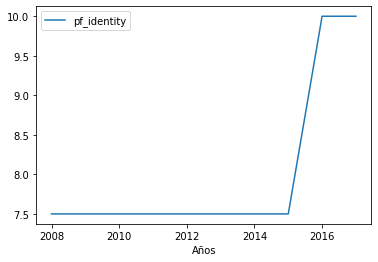

Brazil


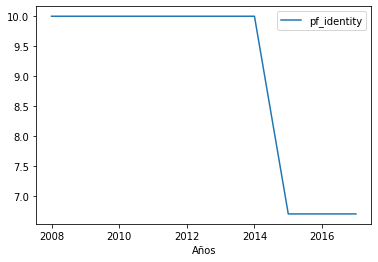

Chile


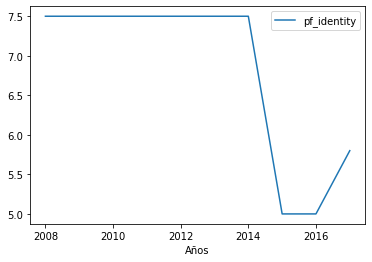

Costa Rica


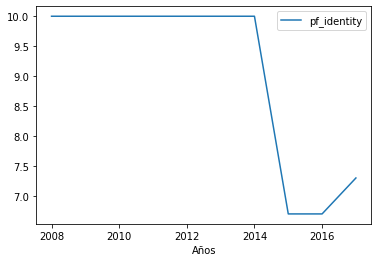

Dominican Rep.


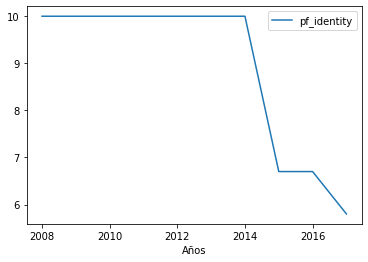

El Salvador


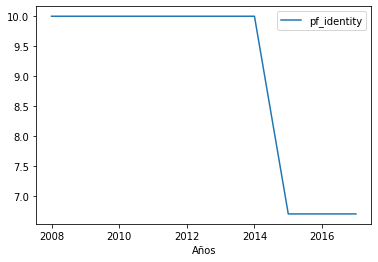

Guatemala


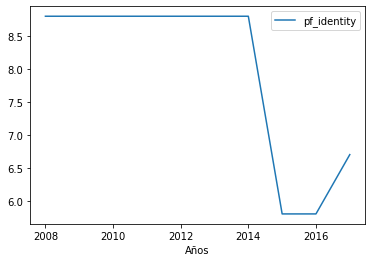

Guyana


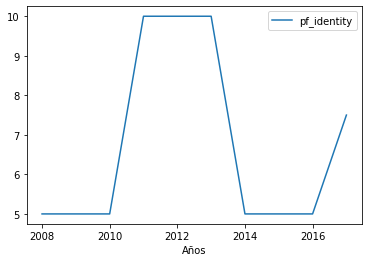

Haiti


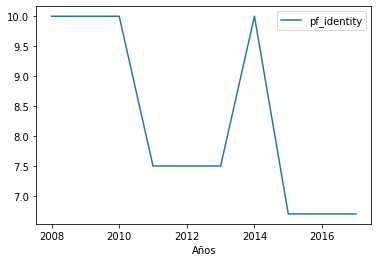

Honduras


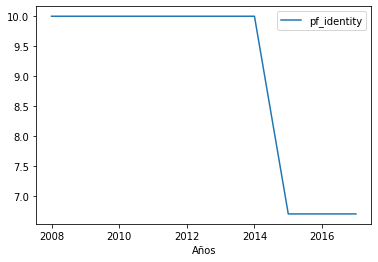

Jamaica


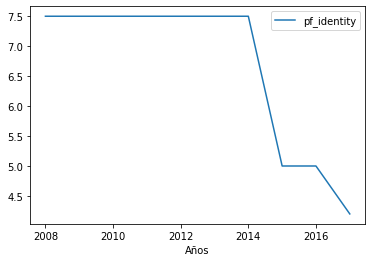

Nicaragua


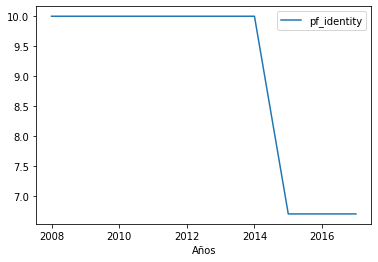

Panama


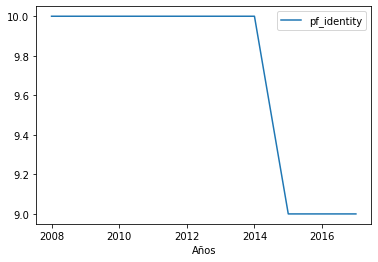

Paraguay


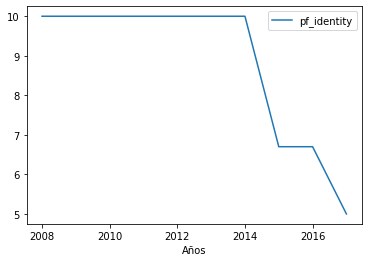

Peru


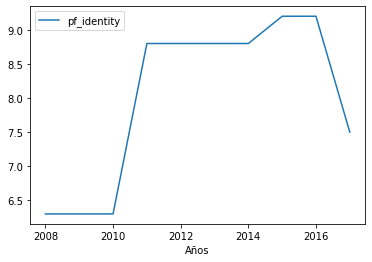

Venezuela


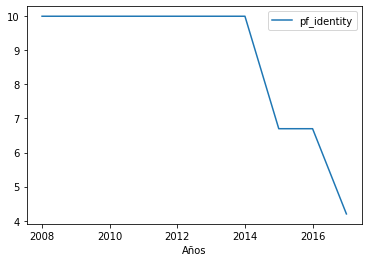

In [33]:
#Valores no atipicos por países de Latam
data=dataset[dataset.region=="Latin America & the Caribbean"]

for country in ["Belize", "Brazil", "Chile", "Costa Rica", "Dominican Rep.", "El Salvador", "Guatemala", 'Guyana', 'Haiti', 'Honduras',
       'Jamaica',  'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Venezuela']:
    print(country)
    df = dataset[dataset.countries == country]
    df.groupby(["year"]).mean()[['pf_identity']].plot()
    plt.xlabel('Años')
    plt.show()

Como revelan los gráficos anteriores, la variable pf_identity cae para la mayoría de los países en el año 2014, salvo excepciones particulares (Belize, Peru).

En resumen, pf_identity para la región se comporta de la siguiente manera a través de los años, demostrando una tendencia en caída desde 2014:

Text(0.5, 0, 'Años')

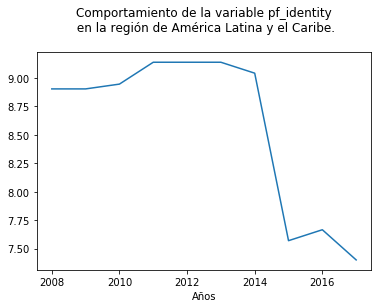

In [34]:
data.groupby("year").mean()["pf_identity"].plot()
plt.title('Comportamiento de la variable pf_identity\n en la región de América Latina y el Caribe.\n')
plt.xlabel('Años')

4. Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

Text(0.5, 1.0, 'Libertad Ecónomica, personal y humana en el tiempo.\n')

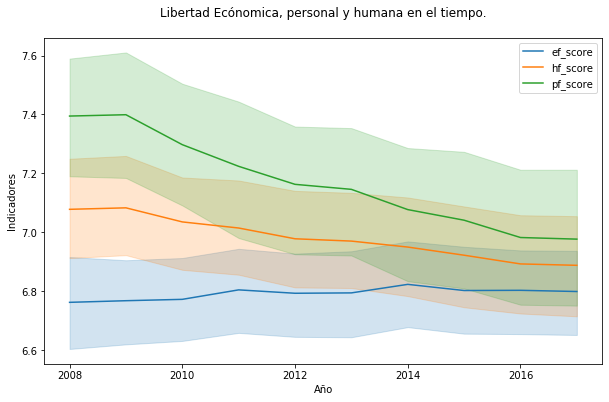

In [35]:
plt.figure(figsize=(10,6))

seaborn.lineplot(data=dataset, x="year", y="ef_score", label="ef_score")
seaborn.lineplot(data=dataset, x="year", y="hf_score", label="hf_score")
seaborn.lineplot(data=dataset, x="year", y="pf_score", label="pf_score")

plt.xlabel("Año")
plt.ylabel("Indicadores")
plt.title("Libertad Ecónomica, personal y humana en el tiempo.\n")

Globalmente, por más de que la libertad económica presenta tendencia creciente, la libertad humana decrece levemente debido a que la libertad personal está decreciendo fuertemente. Para un analisis más exhaustivo se deberian estudiar estas tendencias país por país. 


## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


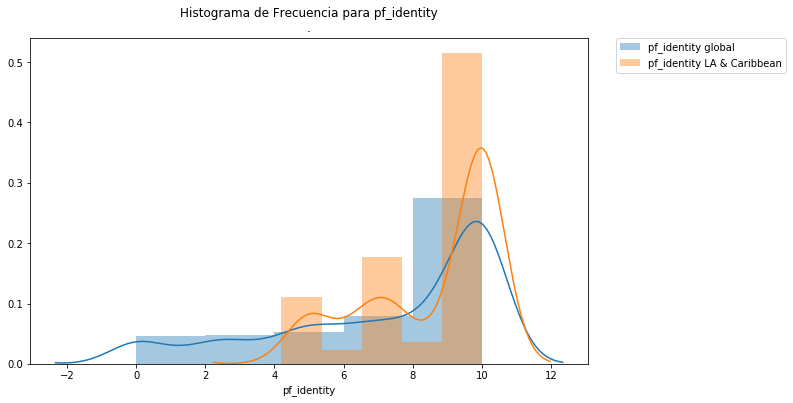

In [36]:
# pf_identity

plt.figure(figsize=(10,6))

seaborn.distplot(dataset.pf_identity, bins=5, label="pf_identity global")
seaborn.distplot(dataset.pf_identity[dataset.region=="Latin America & the Caribbean"], bins=5, label="pf_identity LA & Caribbean")
plt.title("Histograma de Frecuencia para pf_identity\n.")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Tanto para pf_identity global como en Latam se observa asimetria negativa. 
Para la variable global se podría tratar de una función de distribución normal asimétrica, como así también para la variable en Latam.

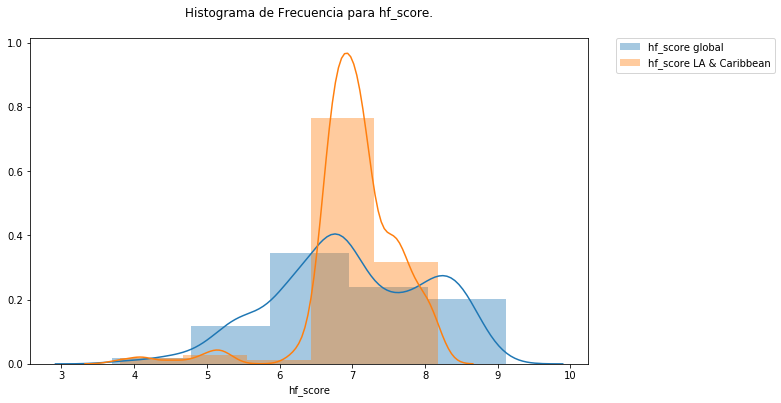

In [37]:
# hf_score

plt.figure(figsize=(10,6))

seaborn.distplot(dataset.hf_score, bins=5, label="hf_score global")
seaborn.distplot(dataset.hf_score[dataset.region=="Latin America & the Caribbean"], bins=5, label="hf_score LA & Caribbean")
plt.title("Histograma de Frecuencia para hf_score.\n")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

La variable global no pareciera asociarse con una distribución clara, mientras que en Latam se podría aproximar a una normal con alta curtosis.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.

Realizamos los puntos 1 y 2 en el mismo gráfico de continuación:



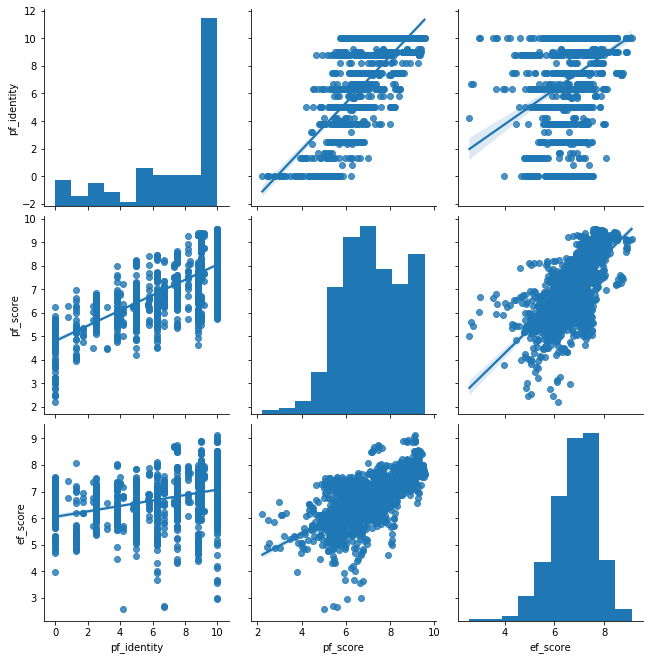

In [38]:
seaborn.pairplot(
    data=dataset,
    vars=['pf_identity', 'pf_score', 'ef_score'],
    hue=None, height=3, kind='reg')

Se observa que:

- Las variables pf_score y ef_score parecieran tener una relación directa, que se afianza a medida que el puntaje es mayor para ambas variables. Existe gran dispersión para bajos puntajes de las variables, mientras que la dispersión es menor y se consolida la correlación positiva para puntajes elevados.
- Las varibles pf_identity y pf_score parecieran tener una relación directa, con gran dispersión de los puntos y cierto ordenamiento escalonado de éstos. Esto último debido a que la primer variable en cuestión puede considerarse discreta ya sólo asume ciertos valores. Entonces el gráfico no parece ser adecuado porque solo hay 26 realizaciones diferentes para pf_identity.
- Las variables pf_identity y ef_score no parecieran tener una relación estrecha y existe gran dispersión de los datos.

3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.

Como se observa a continuación, tomamos los intervalos en función de los cuartiles. El intervalo low va del valor mínimo al primer cuartil, el intervalo medium del primer al tercer cuartil y el intervalo high del tercer cuartil al valor máximo tomado por la variable.

In [39]:
def get_intervals_from_describe(data):
    intervals = [
        (data.loc['min'], data.loc['25%']),
        (data.loc['25%'], data.loc['75%']),
        (data.loc['75%'], data.loc['max'] + 0.1)
    ]
    return pandas.IntervalIndex.from_tuples(intervals, closed='left')

In [40]:
def to_categorical(column, labels=['low', 'medium', 'high']):
    data = column.describe()
    interval_index = get_intervals_from_describe(data)

    return pandas.cut(column, interval_index, labels=labels, include_lowest=True)

In [41]:
dataset['pf_identity_segment'] = to_categorical(dataset['pf_identity'].dropna())
dataset['pf_score_segment'] = to_categorical(dataset['pf_score'])
dataset['ef_score_segment'] = to_categorical(dataset['ef_score'])

4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.

*pf_score vs. ef_score*

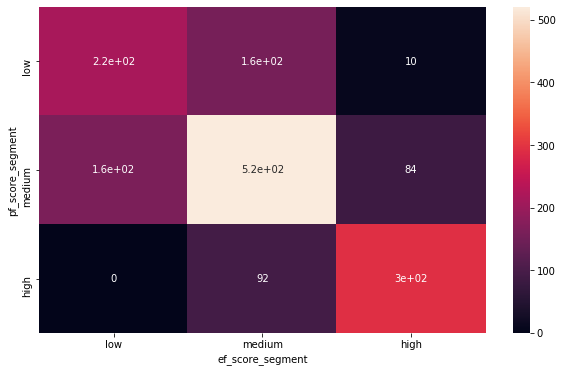

In [42]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(dataset.pf_score_segment, dataset.ef_score_segment)
seaborn.heatmap(exp, annot=True, xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])

*pf_identity vs. ef_score*

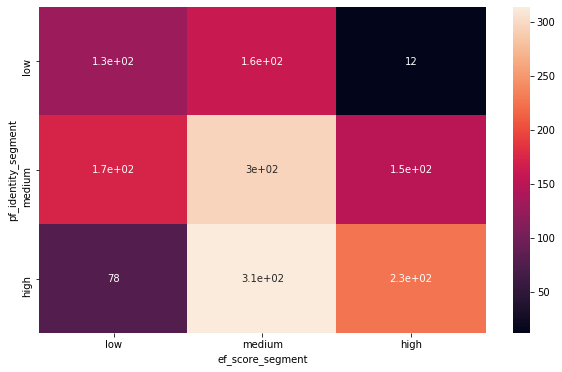

In [43]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(dataset.pf_identity_segment, dataset.ef_score_segment)
seaborn.heatmap(exp, annot=True, xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])

*pf_score vs. pf_identity*

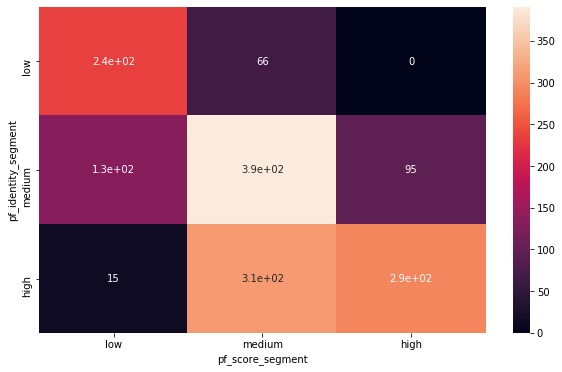

In [44]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(dataset.pf_identity_segment, dataset.pf_score_segment)
seaborn.heatmap(exp, annot=True, xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [45]:
from scipy import stats

In [46]:
def ks_test_norm(column):
    
    data=column.dropna().to_numpy()

    # Fit a normal distribution to the data:
    mu, std = stats.norm.fit(data)

    # Grafico el histograma
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Grafico la curva de distribucion que se ajusta a mis datos.
    xmin, xmax = plt.xlim()
    x = numpy.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "mu = %.2f,  std = %.2f\n" % (mu, std)
    plt.title(title)

    plt.show()

    # Creo una distribucion normal con los parametros de mu y std de mi distribucion (Necesario?)
    # creo que es necesario para poder tener el cdf
    n = stats.norm(loc=mu, scale=std)

    ks_result = stats.kstest(data, n.cdf)
    print(ks_result)
    print('H0 (Los datos se ajustan a la distribución normal): ', 'Rechazo' if ks_result.pvalue <= 0.05 else 'No Rechazo')

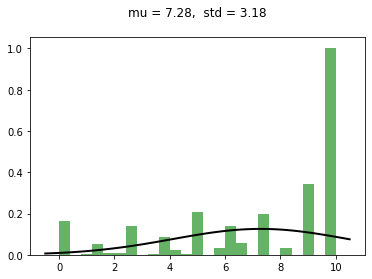

KstestResult(statistic=0.22123100734628914, pvalue=1.1136019711157535e-66)
H0 (Los datos se ajustan a la distribución normal):  Rechazo


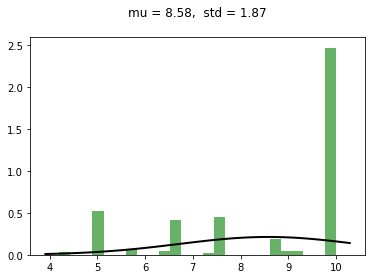

KstestResult(statistic=0.3492111070640965, pvalue=1.258729000680362e-28)
H0 (Los datos se ajustan a la distribución normal):  Rechazo


In [47]:
ks_test_norm(dataset.pf_identity)
ks_test_norm(dataset[dataset.region=="Latin America & the Caribbean"].pf_identity)

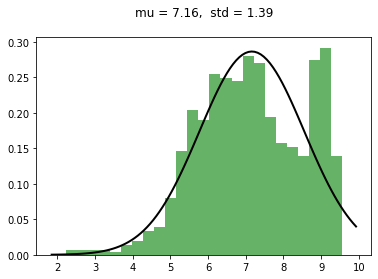

KstestResult(statistic=0.07053916911308933, pvalue=4.1536497194585037e-07)
H0 (Los datos se ajustan a la distribución normal):  Rechazo


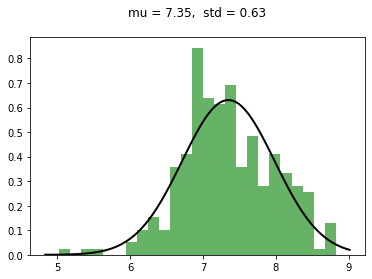

KstestResult(statistic=0.054195468433476335, pvalue=0.4239026359095348)
H0 (Los datos se ajustan a la distribución normal):  No Rechazo


In [48]:
ks_test_norm(dataset.pf_score)
ks_test_norm(dataset[dataset.region=="Latin America & the Caribbean"].pf_score)

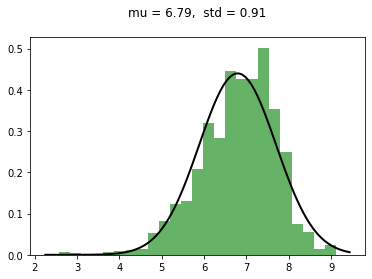

KstestResult(statistic=0.05071662574772917, pvalue=0.000698635600079327)
H0 (Los datos se ajustan a la distribución normal):  Rechazo


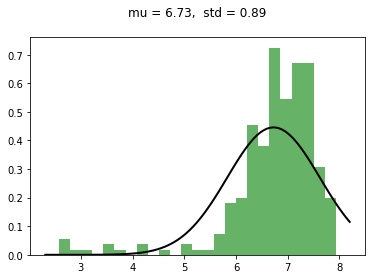

KstestResult(statistic=0.13646642411809573, pvalue=0.00011861345386544373)
H0 (Los datos se ajustan a la distribución normal):  Rechazo


In [49]:
ks_test_norm(dataset.ef_score)
ks_test_norm(dataset[dataset.region=="Latin America & the Caribbean"].ef_score)

Para hacer un análisis más exhaustivo sobre a que distribución se ajustan los datos probamos con varias distribuciones para la variable ef_score. Donde nos da que la distribución que mejor se ajusta es una weibull_min.

In [50]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

def best_dist_fit(column, bins=51):
    y = column
    x = numpy.arange(len(y))
    size = len(y)

  # Primero estandaricemos los datos con el escalador estándar de sklearn:

    sc=StandardScaler() 
    yy = y.to_numpy().reshape(-1,1)
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    y_std_series = pandas.Series(y_std)
    y_std_series = y_std_series[numpy.isfinite(y_std_series)]
    y_std = y_std_series.to_list()

    del yy

  # Proponemos distribuciones candidatas para usar

    dist_names = ['beta',
                'expon',
                'gamma',
                'lognorm',
                'norm',
                'uniform',
                'weibull_min', 
                'weibull_max']

    # Configuramos listas vacías para almacenar resultados
    chi_square = []
    p_values = []

    # Configuramos 50 bins para la prueba de chi-cuadrado
    # Los datos observados se distribuirán aproximadamente de manera uniforme en todos bins

    percentile_bins = numpy.linspace(0,100,bins)
    percentile_cutoffs = numpy.percentile(y_std, percentile_bins)
    observed_frequency, bins = (numpy.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = numpy.cumsum(observed_frequency)

    # Loop de distribuciones candidatas

    for distribution in dist_names:
      # Configuración de la distribución y obtención de parámetros de distribución ajustados
      dist = getattr(stats, distribution)
      param = dist.fit(y_std)

      # Obtención del estadístico P de la prueba KS, redondeamos a 5 decimales
      p = stats.kstest(y_std, distribution, args=param)[1]
      p = numpy.around(p, 5)
      p_values.append(p)    

      # Obtenemos los recuentos esperados en contenedores de percentiles
      # Esto se basa en una 'función de distribución acumulativa' (cdf)
      cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                            scale=param[-1])
      expected_frequency = []
      for bin in range(len(percentile_bins)-1):
          expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
          expected_frequency.append(expected_cdf_area)

      # Calculamos el estadistico chi-cuadrado
      expected_frequency = numpy.array(expected_frequency) * size
      cum_expected_frequency = numpy.cumsum(expected_frequency)
      ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
      chi_square.append(ss)

    # Clasificamos resultados y ordenamos por bondad de ajuste (mejor en la parte superior)

    results = pandas.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square
    results['p_value'] = p_values
    results.sort_values(['chi_square'], inplace=True)

    # Reportes

    print ('\nDistribuciones ordenadas por bondad de ajuste:')
    print ('----------------------------------------')
    print (results)

In [51]:
best_dist_fit(dataset.ef_score) 


Distribuciones ordenadas por bondad de ajuste:
----------------------------------------
  Distribution    chi_square  p_value
6  weibull_min    139.442311  0.61711
7  weibull_max    253.088964  0.00245
4         norm    409.742072  0.00070
3      lognorm    427.022020  0.00049
2        gamma    529.565146  0.00002
5      uniform  35936.132730  0.00000
0         beta  39157.000000  0.00000
1        expon  47145.242147  0.00000


## 4. Correlaciones

1. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 


In [52]:
stats.spearmanr(dataset['pf_score'].dropna(), dataset['ef_score'].dropna())

SpearmanrResult(correlation=0.7107413891778127, pvalue=3.194041345782152e-237)

In [53]:
stats.spearmanr(dataset['pf_identity'].dropna(), dataset['ef_score'].dropna())

SpearmanrResult(correlation=0.40077737030068, pvalue=1.6873618909139198e-60)

In [54]:
stats.spearmanr(dataset['pf_identity'].dropna(), dataset['pf_score'].dropna())

SpearmanrResult(correlation=0.7313581415245098, pvalue=6.2822504661055415e-258)

Al dar una correlación R, con  0 < R < 1, las variables se relacionan positivamente en los 3 casos. Tomamos el coeficiente de correlacion de spearman ya que las distribuciones no se distribuyen de forma normal, como vimos anteriormente.
Podemos observar que las variables con mayor correlación son `pf_identity` y `pf_score`, ya que da un mayor coeficiente R.

2. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?

# Conclusiones

Nosotros centraremos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de identidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.

En base a lo analizado en el ejercicio 1.3 de la parte 1 podemos deducir que un valor de `4.5` en `pf_identity` es un valor bajo ya que la media global es `7.280649350649332`, mientras que la media en Latinoamerica y el Caribe es de `8.582170542635659`. Dicho esto se puede considerar a Latinoamerica y el Caribe como una región con un puntaje alto en comparación al resto del mundo.

2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?

A lo largo de los años se ve una tendencia en caída, acentuada a partir del 2014. Respecto a Latinoamérica y el Caribe se observa que decae más que en el resto del mundo. Esto se puede ver en los gráficos de los ejercicios 2.1 y 2.2 de la parte 1.


3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

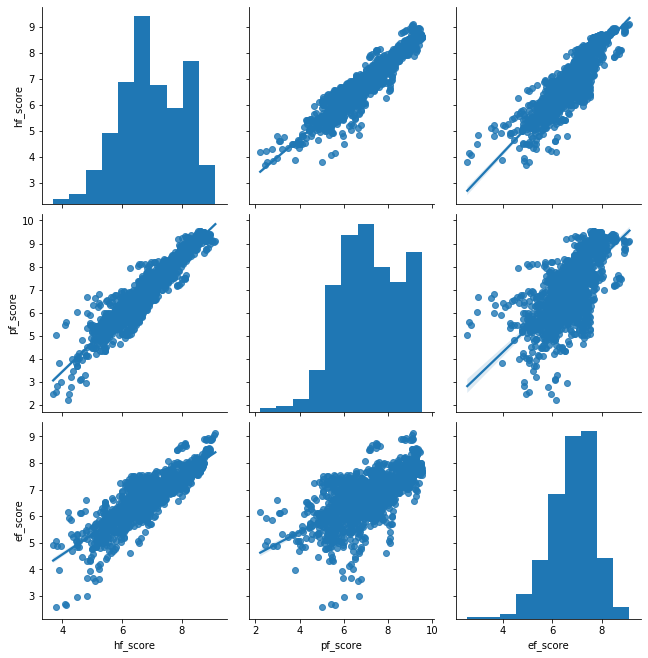

In [55]:
seaborn.pairplot(
    data=dataset,
    vars=['hf_score', 'pf_score', 'ef_score'],
    hue=None, height=3, kind='reg')

En el gráfico anterior se muestra una correlación positiva entre ef_score y pf_score con hf_score al igual que sucede con pf_identity (como se muestra en el ejercicio 4 de la parte 1).

### *¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de identidad?*

Como se mencionó, en el caso del resto del mundo, las variables pf_identity y hf_score están en tendencia bajista a lo largo de los años, lo mismo podemos observar en el caso de América Latina y el Caribe, solo que la caída en el resto del mundo es más pronunciada (debido que recibe el aporte de las demás regiones). Sin embargo, la media de estas variables es mayor en Latam que en el resto del mundo (a lo largo de los años), por ello podríamos decir que estamos mejor posicionados.

hf_score se construye en base a las variables ef_score y pf_score, las cuales estuvieron en caída a lo largo de los años en América Latina y el Caribe, por lo cual es consistente que hf_score haya disminuído. 

En el caso de pf_identity, es calculada en base a otros variables que graficaremos a continuación:

Text(0, 0.5, 'Indicadores')

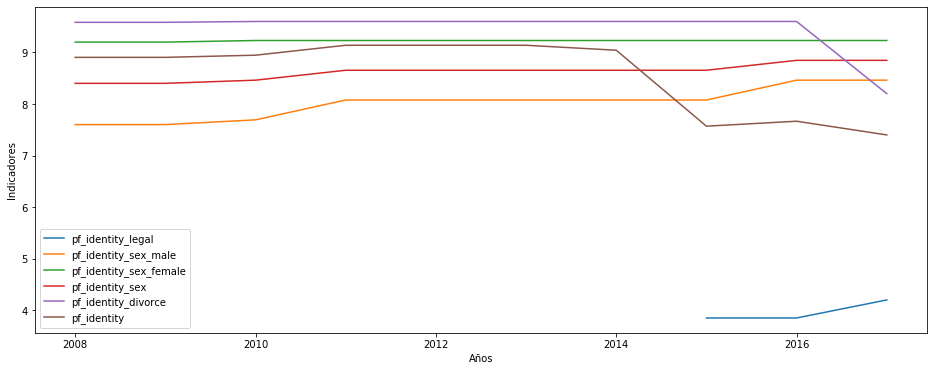

In [57]:
pf_identity_columns = [col for col in dataset.columns if 'pf_identity' in col] + ['year', 'region']
pf_identity_sub = dataset[pf_identity_columns]
pf_identity_sub_mean = pf_identity_sub[pf_identity_sub['region'] == 'Latin America & the Caribbean'].groupby('year').mean().plot(figsize=(16,6))
plt.xlabel('Años')
plt.ylabel('Indicadores')

En Latinoamerica y el Caribe se observan puntajes relativamente altos en cuanto a libertades de identidad, como se muestra en el gráfico anterior. Y a partir de 2014 se observa una caída en el valor debido a que aparecen valores de pf_identity_legal, los cuales no existían en años anteriores desviando el promedio hacia abajo.

Eastern Europe


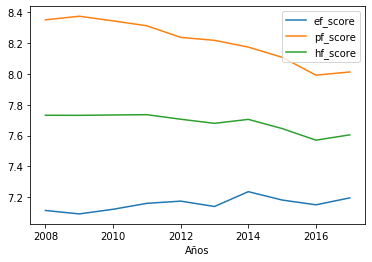

Middle East & North Africa


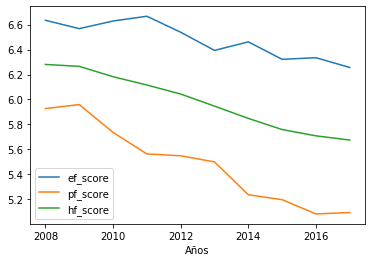

Sub-Saharan Africa


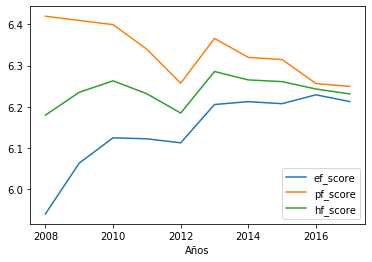

Latin America & the Caribbean


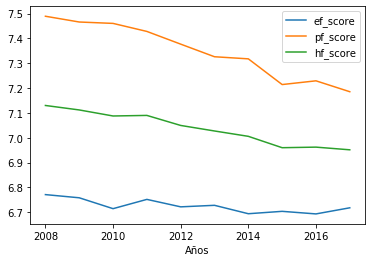

Caucasus & Central Asia


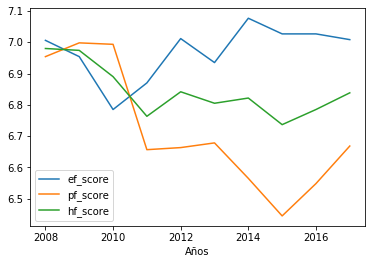

Oceania


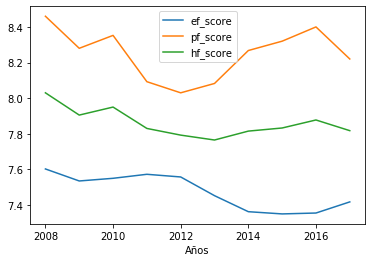

Western Europe


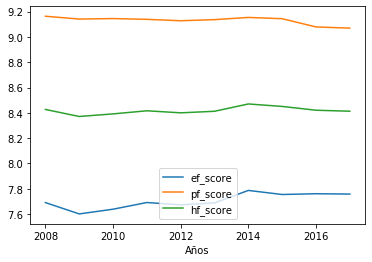

South Asia


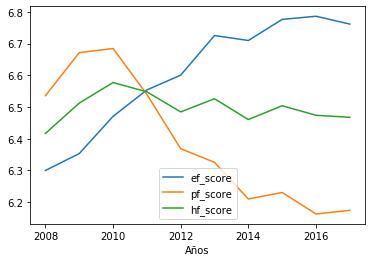

North America


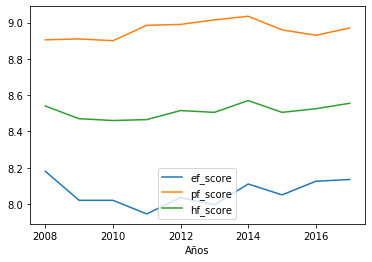

East Asia


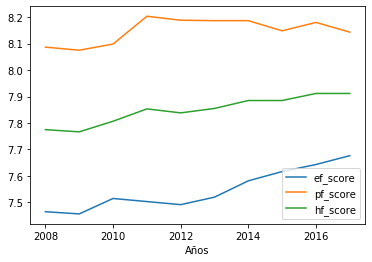

In [60]:
for region in dataset.region.unique():
    print(region)
    df = dataset[dataset.region == region]
    df.groupby(["year"]).mean()[['ef_score', 'pf_score','hf_score' ]].plot()
    plt.xlabel('Años')
    plt.show()